The following functions are one I used while running the batches to summarise the simulations which had been done, find errors etc. - so are to be used with 'batchrunner'.

As of May 2023 - it is well worth signing up for GPT4 - it codes really well and helps resolve many errors. GPT3.5 is not very good at coding and GitHub Co-Pilot seems as though it is running 3.5 not 4 as is said (but can be helpful especially with rewriting things or small changes)

In [1]:
import os
import sys
import pandas as pd
import numpy as np

#Find the current directory
current_dir = os.getcwd()

#Load extra_functions.py in the current_dir
sys.path.append(current_dir)

print(current_dir)


/Users/a/Downloads/Astrobiology


In [213]:
import os
import json
import pandas as pd

# define the parent directory
parent_dir = current_dir+'/jobs/'

# create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['number', 'output?', 'vx', 'vy', 'vz'])

#count number of subfolders in parent directory and assign to length - avoid error: TypeError: 'int' object is not callable
subfolders = next(os.walk(parent_dir))[1]

#del len
length = len(subfolders)

#Ignore errors
import warnings
warnings.filterwarnings("ignore")

# iterate over each subfolder
for i in os.listdir(parent_dir): 
    subfolder = os.path.join(parent_dir, str(i))
        # Check if the current item is a directory
    if not os.path.isdir(subfolder):
        continue

    # check if the output folder exists
    output_folder = os.path.join(subfolder, 'output')
    if os.path.isdir(output_folder):
        output = 1
    else:
        output = 0

    # read the merge.json file and extract the velocity_galaxy_2 parameters
    merge_file = os.path.join(subfolder, 'merge.json')
    with open(merge_file) as f:
        data = json.load(f)
        vx = data['velocity_galaxy_2']['vx']
        vy = data['velocity_galaxy_2']['vy']
        vz = data['velocity_galaxy_2']['vz']

    # append the results to the dataframe
    results_df = results_df.append({'number': i, 'output?': output, 'vx': vx, 'vy': vy, 'vz': vz}, ignore_index=True)

# Count number of 1 and 0 in output? colummn and print
print(results_df['output?'].value_counts())


1    132
Name: output?, dtype: int64


In [197]:
import os
import json
import pandas as pd

# define the path to the jobs folder
jobs_folder = current_dir+'/jobs_back'

# create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['number', 'output?', 'vx', 'vy', 'vz'])

#count the number of subfolders in the jobs folder
num_subfolders = os.listdir(jobs_folder)

# loop over each subfolder
for i in num_subfolders:
    subfolder = os.path.join(jobs_folder, str(i))
        # Check if the current item is a directory
    if not os.path.isdir(subfolder):
        continue
    
    # check if the output folder existsvc
    output_folder = os.path.join(subfolder, 'output')
    output = 1 if os.path.exists(output_folder) else 0
    
    # read the merge.json file for the velocity_galaxy_2 parameters
    merge_file = os.path.join(subfolder, 'merge.json')
    with open(merge_file, 'r') as f:
        data = json.load(f)
        vx = data['velocity_galaxy_2']['vx']
        vy = data['velocity_galaxy_2']['vy']
        vz = data['velocity_galaxy_2']['vz']
    
    # append the results to the dataframe
    new_row = {'number': i, 'output?': output, 'vx': vx, 'vy': vy, 'vz': vz}
    results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)

# print the results
print(results_df)


       number output?     vx     vy vz
0        1069       1   -750   -650  0
1        1056       1   -800   -600  0
2        1051       1   -800   -900  0
3        1058       1   -800   -500  0
4        1093       1   -650   -800  0
5        1067       1   -750   -800  0
6    Control2       1      0      0  0
7        1060       1   -800   -400  0
8        1094       1   -650   -750  0
9        1034       1   -900   -400  0
10       1206       1   -250   -600  0
11        168       1  -1000   -850  0
12       1201       1   -300   -400  0
13       1033       1   -900   -450  0
14       1005       1  -1000   -650  0
15        166       1   -500   -850  0
16       1208       1   -250   -500  0
17       1002       1  -1000   -850  0
18       1230       1   -100    -50  0
19   Control3       1      0      0  0
20       1095       1   -650   -700  0
21       1061       1   -800   -350  0
22       1059       1   -800   -450  0
23       1066       1   -750   -850  0
24       1092       1   -

In [214]:
# This helps identify which functions have missing output where an error
# occured and it did not
# properly download

import os
import json
import pandas as pd

# define the path to the jobs folder
jobs_folder = current_dir+'/jobs'

# create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['number', 'subfolder'])

# loop over each subfolder
for i in os.listdir(jobs_folder):
    subfolder = os.path.join(jobs_folder, str(i)+"/output")
    
    # Check if the current item is a directory
    if not os.path.isdir(subfolder):
        continue
    
    #Check if it exists
    if not os.path.exists(subfolder):
        continue
    # Count the number of subfolders in subfolder
    num_subfolders2 = len(os.listdir(subfolder))

    # append the results to the results_df dataframe
    new_row = {'number': i, 'subfolder': num_subfolders2}
    results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)
    
# print the results which have less than seven subfolders
print(results_df[results_df['subfolder'] < 7])




Empty DataFrame
Columns: [number, subfolder]
Index: []


The following plots the velocities and starting positions of the initial vectors we have

In [1]:
import os
import json
import pandas as pd

# define the path to the jobs folder
jobs_folder = current_dir+'/jobs_back'

# create an empty dataframe to store the results
results_current = pd.DataFrame(columns=['number', 'vx', 'vy', 'vz'])

#count the number of subfolders
subfolders = next(os.walk(jobs_folder))[1]
num_subfolders = len(subfolders)
num_subfolders = 186-171 + 1

# loop over each subfolder
for i in range(171, num_subfolders+171):
    subfolder = os.path.join(jobs_folder, str(i))
    
    # read the merge.json file for the velocity_galaxy_2 parameters
    merge_file = os.path.join(subfolder, 'merge.json')
    with open(merge_file, 'r') as f:
        data = json.load(f)
        vx = data['velocity_galaxy_2']['vx']
        vy = data['velocity_galaxy_2']['vy']
        vz = data['velocity_galaxy_2']['vz']
    
    # append the results to the dataframe
    new_row = {'number': i, 'vx': vx, 'vy': vy, 'vz': vz}
    results_current = pd.concat([results_current, pd.DataFrame([new_row])], ignore_index=True)

# print the results
print(results_current)
#

   number     vx     vy vz
0     171  -1000  -1000  0
1     172  -1000   -700  0
2     173  -1000   -400  0
3     174  -1000   -100  0
4     175   -700  -1000  0
5     176   -700   -700  0
6     177   -700   -400  0
7     178   -700   -100  0
8     179   -400  -1000  0
9     180   -400   -700  0
10    181   -400   -400  0
11    182   -400   -100  0
12    183   -100  -1000  0
13    184   -100   -700  0
14    185   -100   -400  0
15    186   -100   -100  0


In [113]:

### TO analyse the new simulations to run
import os
import json
import pandas as pd

# define the path to the jobs folder
jobs_folder = current_dir+'/examplejobs'

# create an empty dataframe to store the results
new_runs = pd.DataFrame(columns=['number', 'vx', 'vy', 'vz'])

#count the number of subfolders
subfolders = next(os.walk(jobs_folder))[1]
num_subfolders = len(subfolders)


# loop over each subfolder
for i in range(1000, num_subfolders+1000):
    subfolder = os.path.join(jobs_folder, str(i))
    
    # read the merge.json file for the velocity_galaxy_2 parameters
    merge_file = os.path.join(subfolder, 'merge.json')
    with open(merge_file, 'r') as f:
        data = json.load(f)
        vx = data['velocity_galaxy_2']['vx']
        vy = data['velocity_galaxy_2']['vy']
        vz = data['velocity_galaxy_2']['vz']
    
    # append the results to the dataframe
    new_row = {'number': i, 'vx': vx, 'vy': vy, 'vz': vz}
    new_runs = pd.concat([new_runs, pd.DataFrame([new_row])], ignore_index=True)

# print the results
print(new_runs)


    number     vx     vy vz
0     1000  -1000  -1000  0
1     1001  -1000   -950  0
2     1002  -1000   -900  0
3     1003  -1000   -850  0
4     1004  -1000   -800  0
5     1005  -1000   -750  0
6     1006  -1000   -700  0
7     1007  -1000   -650  0
8     1008  -1000   -600  0
9     1009  -1000   -550  0
10    1010  -1000   -500  0
11    1011  -1000   -450  0
12    1012  -1000   -400  0
13    1013  -1000   -350  0
14    1014  -1000   -300  0
15    1015  -1000   -250  0
16    1016  -1000   -200  0
17    1017  -1000   -150  0
18    1018  -1000   -100  0
19    1019  -1000    -50  0
20    1020  -1000      0  0
21    1021   -950  -1000  0
22    1022   -950   -950  0
23    1023   -950   -900  0
24    1024   -950   -850  0
25    1025   -950   -800  0
26    1026   -950   -750  0
27    1027   -950   -700  0
28    1028   -950   -650  0
29    1029   -950   -600  0
30    1030   -950   -550  0
31    1031   -950   -500  0
32    1032   -950   -450  0
33    1033   -950   -400  0
34    1034   -950   

/var/folders/vr/rhsk03s1645f1yb1xn24mt680000gn/T/ipykernel_1242/4131841514.py:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax.plot(0, 0, 'ko',color='r')


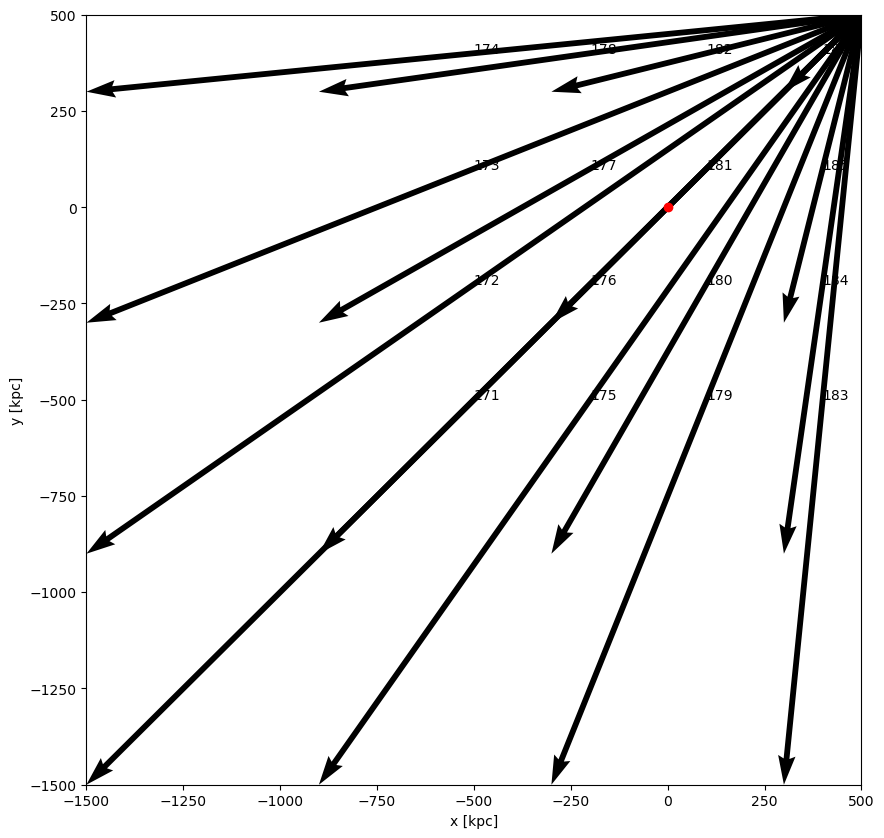

In [91]:
# vx and vy are velocities in the x and y dirrection. Plot a quiver plot from results.df with all starting at 100,100
# and a length corresponding to the velocity for each arrow. Use the vx and vy columns for the x and y length components of the arrows.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#transform from results_df the columns vx and vy into the form vx = [vx1, vx2, vx3, ...] and vy = [vy1, vy2, vy3, ...]
vx = results_current['vx'].tolist()
vy = results_current['vy'].tolist()

#Create 'x_pos' and 'y_pos' for the starting positions which are 100 and 100 for both. Make them both [100, 100, 100, ...] with the same length as vx and vy
x_pos = [500] * len(vx)
y_pos = [500] * len(vy)


# create a figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

#colourise the quiver plot so that the arrows are coloured by the magnitude of the velocity
#colour = np.sqrt(np.square(vx) + np.square(vy))

#add a column from results_current called 'number' as labels for the arrows
label = results_current['number'].tolist()

#Add a colour array color_array which colours the arrows as per their length. All values of vx and vy are negative
#so sqrt(vx) will not return a number
#color_array = np.sqrt(np.square(vx) + np.square(vy))



# plot a quiver plot using plt.quiver. Scale the arrows so they are clear
ax.quiver(x_pos, y_pos, vx, vy, scale=0.5, scale_units='xy', angles='xy')

# add a point at 0,0
ax.plot(0, 0, 'ko',color='r')

#add the labels to the end of each arrow so it is legible
for i, txt in enumerate(label):
    ax.annotate(txt, (x_pos[i] + vx[i], y_pos[i] + vy[i]))

#plt.quiver(data=results_df, x=100, y=100, u='vx', v='vy', ax=ax)

# set the x and y limits
ax.set_xlim(-1500, 500)
ax.set_ylim(-1500, 500)

# set the x and y labels
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')

plt.show()




In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'results_current'

start_x, start_y = 500, 500

#Convert vx and vy to lists
vx = results_current['vx'].tolist()
vy = results_current['vy'].tolist()

# Calculate the angle (in degrees) from 500,500 the vector is pointing at using the vx and vy components
angle = np.arctan2(vy, vx) * 180 / np.pi

# Calculate the length of the vector using the vx and vy components
length = np.sqrt(np.square(vx) + np.square(vy))

#create a dataframe for vx, vy, angle and length and number from the results_current dataframe
results_new = pd.DataFrame({'vx': vx, 'vy': vy, 'angle': angle, 'length': length, 'number': results_current['number']})


# Plot the incoming angles as vectors of approach from (500, 500) to (0, 0)
#fig, ax = plt.subplots(figsize=(10, 10))

# plot a quiver plot using plt.quiver. Plot the arrow direction and length using the angle and length columns
#ax.quiver(start_x, start_y, angle, length, scale=0.5, scale_units='xy', angles='xy')



In [7]:

#drop vx and vy from results_new
results_updated = results_new


This adds feedback colours to the quiver plot - you need to add this in manually - either in something like the next module or in an excel file

In [8]:
#Add in feedback on what ones miss, what ones interract and what ones dont work based on the 'number'

#Create a new column called 'feedback' which is empty
results_updated['feedback'] = ''

#provide me with a blank list of numbers and a place to put 'failed' 'missed', 'shot through' and 'interacted'
failed = [186]
missed = [174, 178, 179, 183]
shot_through = [171, 176, 181]
interacted = [175, 172, 173, 177, 182, 180, 185, 184]

#add to the feedback column based on the number
for i in range(171, 187):
    if i in failed:
        results_updated.at[i-171, 'feedback'] = 'failed'
    elif i in missed:
        results_updated.at[i-171, 'feedback'] = 'missed'
    elif i in shot_through:
        results_updated.at[i-171, 'feedback'] = 'shot through'
    elif i in interacted:
        results_updated.at[i-171, 'feedback'] = 'interacted'
    else:
        results_updated.at[i-171, 'feedback'] = 'worked'

results_updated

,vx,vy,angle,length,number,feedback
0,-1000,-1000,-135.000000,1414.213562,171,shot through
1,-1000,-700,-145.007980,1220.655562,172,interacted
2,-1000,-400,-158.198591,1077.032961,173,interacted
3,-1000,-100,-174.289407,1004.987562,174,missed
4,-700,-1000,-124.992020,1220.655562,175,interacted
5,-700,-700,-135.000000,989.949494,176,shot through
6,-700,-400,-150.255119,806.225775,177,interacted
7,-700,-100,-171.869898,707.106781,178,missed
8,-400,-1000,-111.801409,1077.032961,179,missed
9,-400,-700,-119.744881,806.225775,180,interacted


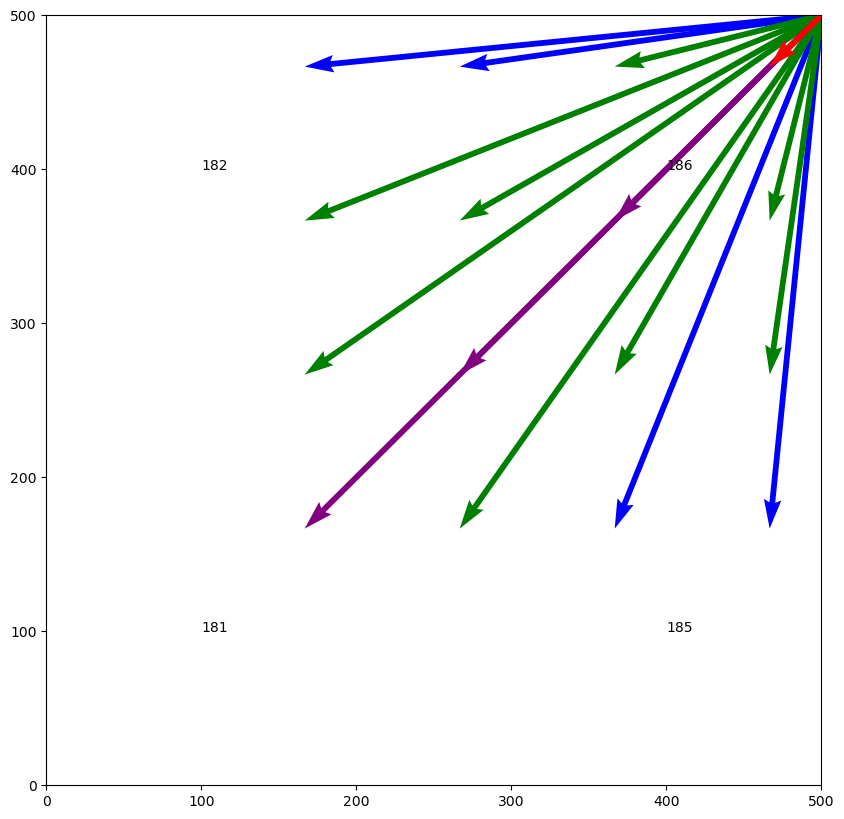

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Assuming results_updated DataFrame is already created

# Convert angles to radians
results_updated['angle_rad'] = np.deg2rad(results_updated['angle'])

# Calculate x and y components of the vectors
#results_updated['vx'] = results_updated['length'] * np.cos(results_updated['angle_rad'])
#results_updated['vy'] = results_updated['length'] * np.sin(results_updated['angle_rad'])

# Define a color map for the feedback column
feedback_color_map = {'shot through': 'purple', 'interacted': 'green', 'missed': 'blue', 'failed': 'red'}
results_updated['color'] = results_updated['feedback'].map(feedback_color_map)

#Add a column in results_updated for x and y which are 500 500 at each point
results_updated['x'] = 500
results_updated['y'] = 500


# Create the quiver plot and add the label (number) in a visible place on the graph for each arrow
fig, ax = plt.subplots(figsize=(10, 10))
ax.quiver(results_updated['x'], results_updated['y'], results_updated['vx'], results_updated['vy'], scale=3, scale_units='xy', angles='xy', color=results_updated['color'])
for i, txt in enumerate(results_updated['number']):
    ax.annotate(txt, (results_updated['x'][i] + results_updated['vx'][i], results_updated['y'][i] + results_updated['vy'][i]))


ax.set_xlim(0, 500)
ax.set_ylim(0, 500)
plt.show()





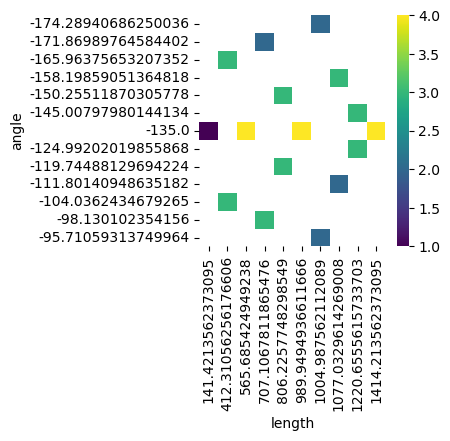

In [20]:
# Create a numerical representation of the 'feedback' column
feedback_num_map = {'shot through': 4, 'interacted': 3, 'missed': 2, 'failed': 1}
results_updated['feedback_num'] = results_updated['feedback'].map(feedback_num_map)

import seaborn as sns

#Create a 3d continous surface for angle x and y length. On it change the colour of the surface based on feedback

# Create a heatmap of the feedback_num column
#Make the plot smaller
fig, ax = plt.subplots(figsize=(3, 3))
sns.heatmap(results_updated.pivot('angle', 'length', 'feedback_num'), cmap='viridis', ax=ax)

plt.show()






In [12]:
#Find ranges of where length and angle is above or below a certain amount, the simulations missed

# Print the angle and length where the feedback is 'missed'
print(results_updated.loc[results_updated['feedback'] == 'missed', ['angle', 'length']])


#Length greater than 1000
#Angle greater than -100 or less than -160



         angle       length
3  -174.289407  1004.987562
7  -171.869898   707.106781
8  -111.801409  1077.032961
12  -95.710593  1004.987562


# Copy the gif files out of their folders to a shared area to make them easier to look at altoghether

In [2]:
import os
import shutil

# Define the source and destination directories
source_dir = current_dir+"/jobs_back/"
dest_dir = current_dir+"/gif_summary/"

#check if dest_dir exists or not - if not create it
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)


# Loop over the folders in the source directory
for folder in os.listdir(source_dir):
    folder_path = os.path.join(source_dir, folder, "output", "Galaxy Interaction")
    gif_file_path = os.path.join(folder_path, '_output_Movie: lastmovie.gif')
    
    # Check if the gif file exists in this folder
    if os.path.isfile(gif_file_path):
        # Copy the file to the destination directory with a new name - including the folder name at the start 'folder_'

        shutil.copy(gif_file_path, os.path.join(dest_dir, folder + '.gif'))
        print('yes')
    else:    
        print('no')


FileNotFoundError: [Errno 2] No such file or directory: '/Users/a/Downloads/Astrobiology/jobs_back/'